In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [3]:
import yfinance as yf

In [30]:
from datetime import datetime
end=datetime.now()
start=datetime(end.year-20,end.month,end.day)

In [31]:
stock='GOOG'
google_data=yf.download(stock,start,end)

[*********************100%***********************]  1 of 1 completed


In [32]:
google_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2005-01-10,4.844342,4.934006,4.777841,4.858290,4.840896,302714411
2005-01-11,4.872238,4.924293,4.811465,4.820432,4.803174,279391317
2005-01-12,4.840108,4.879959,4.744716,4.866260,4.848837,328338096
2005-01-13,4.866260,4.916322,4.833134,4.865015,4.847597,275002929
2005-01-14,4.881702,4.981578,4.835127,4.980582,4.962751,387057368


In [33]:
google_data.shape

(5033, 6)

In [34]:
google_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5033.000000,5033.000000,5033.000000,5033.000000,5033.000000,5.033000e+03
mean,48.888525,49.405432,48.400584,48.910250,48.745695,1.085971e+08
std,46.770763,47.292586,46.311192,46.803085,46.664403,1.417985e+08
min,4.366135,4.443345,4.298140,4.358414,4.342810,1.584340e+05
25%,13.389064,13.501892,13.223186,13.359924,13.312093,2.653660e+07
50%,28.256001,28.498680,27.967216,28.176142,28.075266,5.036200e+07
75%,64.875000,65.436501,64.570503,64.940002,64.707497,1.324386e+08
max,198.529999,202.880005,196.690002,198.160004,198.160004,1.650833e+09


In [35]:
google_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5033 entries, 2005-01-10 to 2025-01-08
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5033 non-null   float64
 1   High       5033 non-null   float64
 2   Low        5033 non-null   float64
 3   Close      5033 non-null   float64
 4   Adj Close  5033 non-null   float64
 5   Volume     5033 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 275.2 KB


In [37]:
google_data.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline


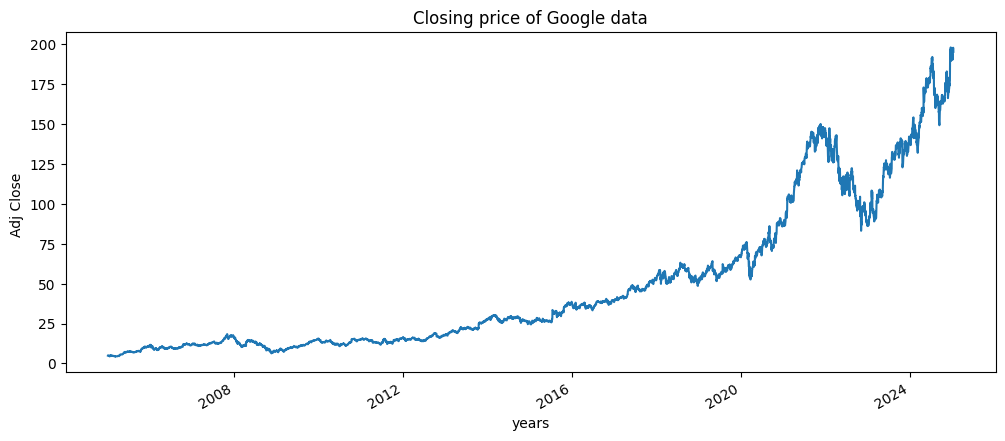

In [40]:
plt.figure(figsize=(12,5))
google_data['Adj Close'].plot()
plt.xlabel('years')
plt.ylabel('Adj Close ')
plt.title('Closing price of Google data')
plt.show()

In [41]:
def plot_graph(figsize,values,column_name):
    plt.figure(figsize=figsize)
    values.plot()
    plt.xlabel('years')
    plt.ylabel(column_name)
    plt.title(f'{column_name} of google data')
    

In [43]:
google_data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

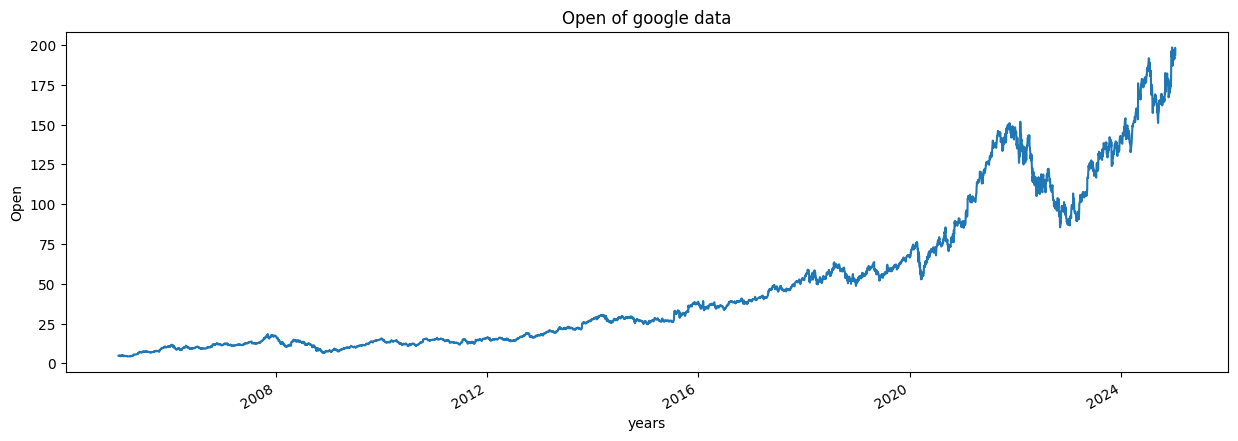

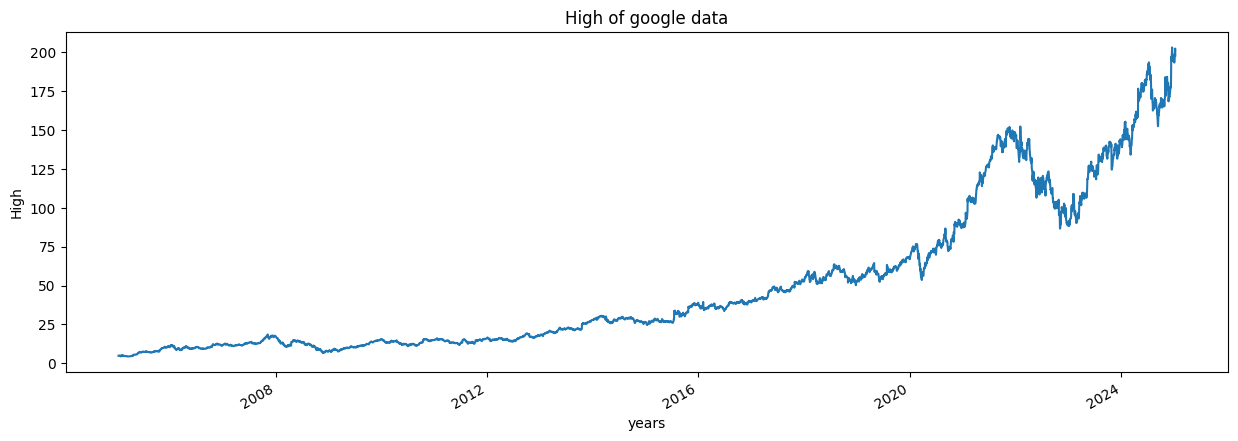

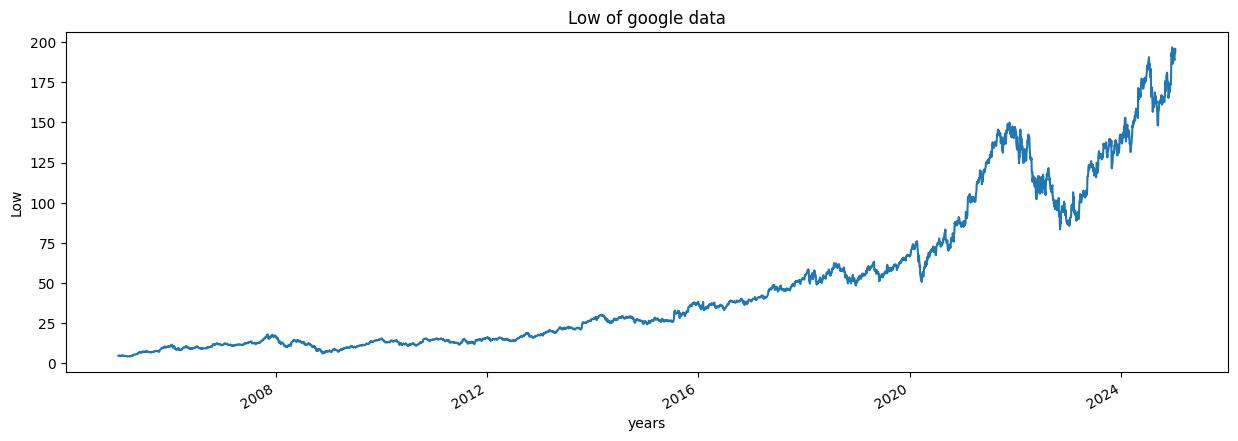

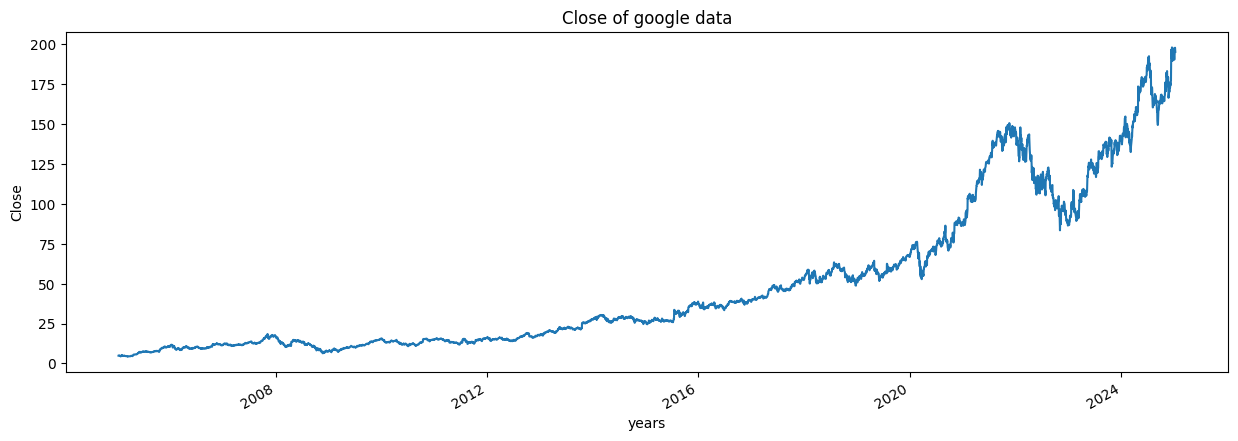

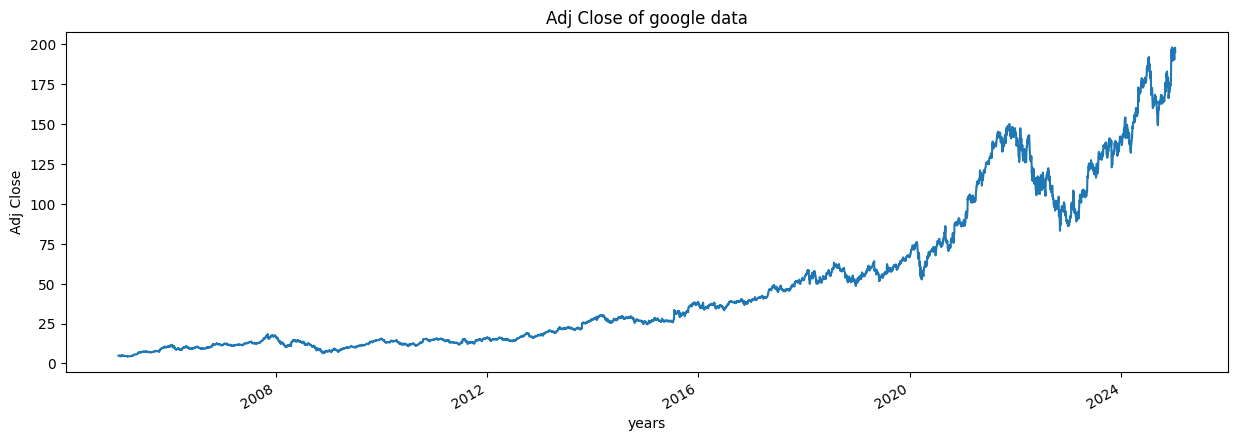

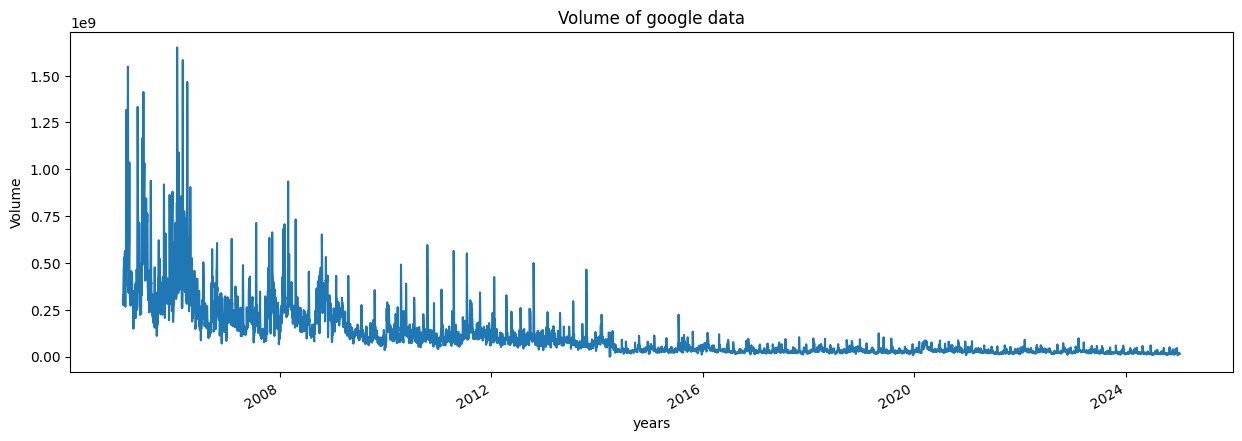

In [44]:
for column in google_data.columns:
    plot_graph((15,5),google_data[column],column)

calculate  for moving average 

In [46]:
for i in range (2005,2025):
    print(i,list(google_data.index.year).count(i))

2005 247
2006 251
2007 251
2008 253
2009 252
2010 252
2011 252
2012 250
2013 252
2014 252
2015 252
2016 252
2017 251
2018 251
2019 252
2020 253
2021 252
2022 251
2023 250
2024 252


In [51]:
google_data['MA_for_250 days']=google_data['Adj Close'].rolling(250).mean()

Date
2005-01-10           NaN
2005-01-11           NaN
2005-01-12           NaN
2005-01-13           NaN
2005-01-14           NaN
                 ...    
2025-01-02    165.296685
2025-01-03    165.521613
2025-01-06    165.753345
2025-01-07    165.971987
2025-01-08    166.180406
Name: MA_for_250 days, Length: 5033, dtype: float64

In [54]:
google_data['MA_for_250 days'][0:250].tail()

Date
2005-12-29         NaN
2005-12-30         NaN
2006-01-03         NaN
2006-01-04         NaN
2006-01-05    6.984022
Name: MA_for_250 days, dtype: float64

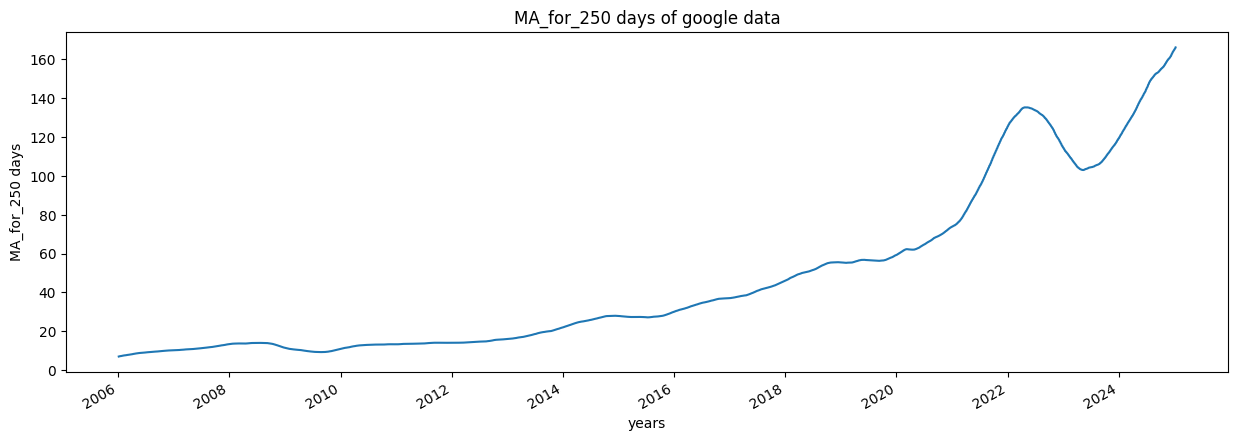

In [55]:
plot_graph((15,5),google_data['MA_for_250 days'],'MA_for_250 days')

<Figure size 1500x500 with 0 Axes>

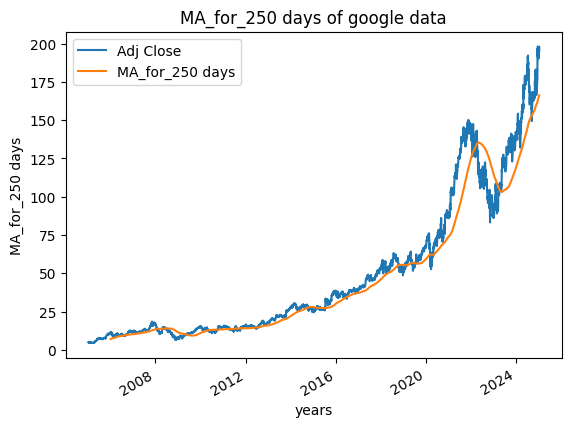

In [57]:
plot_graph((15,5), google_data[['Adj Close','MA_for_250 days']], 'MA_for_250 days')

<Figure size 1500x500 with 0 Axes>

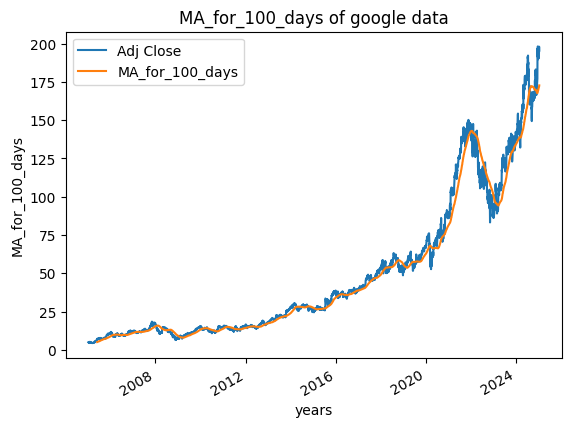

In [58]:
google_data['MA_for_100_days']=google_data['Adj Close'].rolling(100).mean()
plot_graph((15,5),google_data[['Adj Close','MA_for_100_days']],'MA_for_100_days')

<Figure size 1500x500 with 0 Axes>

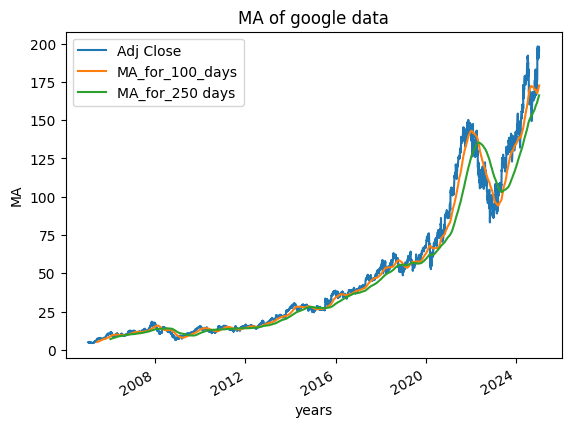

In [59]:
plot_graph((15,5),google_data[['Adj Close','MA_for_100_days','MA_for_250 days']],'MA')

In [62]:
google_data['perecentage_change_cp']=google_data['Adj Close'].pct_change()

In [63]:
google_data[['Adj Close','perecentage_change_cp']].head()

,Adj Close,perecentage_change_cp
Date,,
2005-01-10,4.840896,NaN
2005-01-11,4.803174,-0.007792
2005-01-12,4.848837,0.009507
2005-01-13,4.847597,-0.000256
2005-01-14,4.962751,0.023755


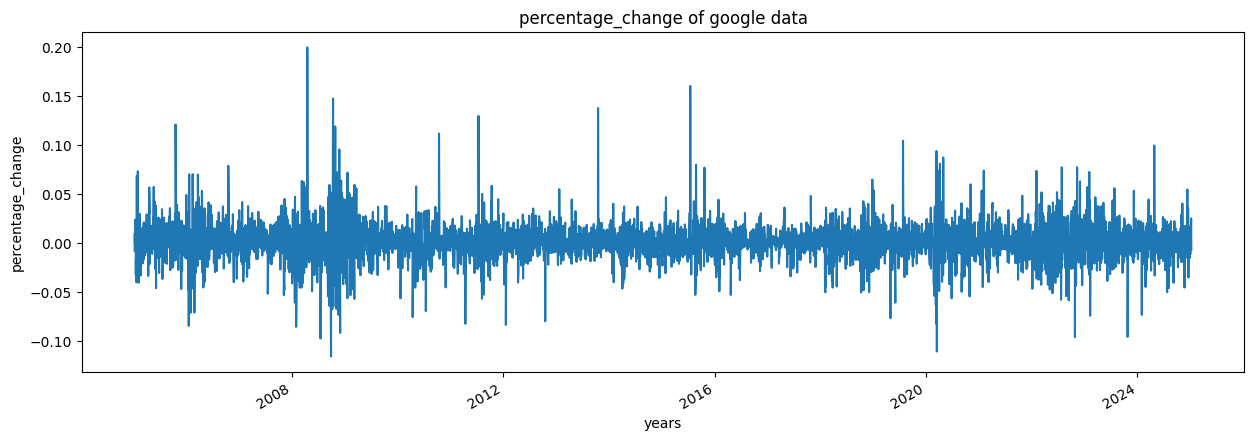

In [65]:
plot_graph((15,5), google_data['perecentage_change_cp'], 'percentage_change')

In [68]:
Adj_close_price=google_data[['Adj Close']]

In [75]:
Adj_close_price

,Adj Close
Date,
2005-01-10,4.840896
2005-01-11,4.803174
2005-01-12,4.848837
2005-01-13,4.847597
2005-01-14,4.962751
...,...
2025-01-02,190.630005
2025-01-03,193.130005
2025-01-06,197.960007


In [70]:
max(Adj_close_price.values),min(Adj_close_price.values)

(array([198.16000366]), array([4.34281015]))

In [72]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(Adj_close_price)
scaled_data

array([[0.00256988],
       [0.00237525],
       [0.00261085],
       ...,
       [0.99896812],
       [0.99251874],
       [0.98570816]])

In [73]:
len(scaled_data)

5033

In [76]:
x_data=[]
y_data=[]

for i in range(100,len(scaled_data)):
    x_data.append(scaled_data[i-100:i])
    y_data.append(scaled_data[i])
    
    

In [77]:
import numpy as np
x_data, y_data = np.array(x_data), np.array(y_data)

In [78]:

x_data[0],y_data[0]

(array([[2.56987508e-03],
        [2.37524535e-03],
        [2.61084795e-03],
        [2.60444886e-03],
        [3.19858495e-03],
        [3.70180034e-03],
        [2.85669991e-03],
        [2.42390155e-03],
        [1.70172710e-03],
        [7.33700686e-04],
        [2.72735024e-04],
        [1.82464816e-03],
        [1.67611598e-03],
        [1.96549700e-03],
        [2.64158375e-03],
        [2.16525141e-03],
        [3.96557270e-03],
        [4.59299833e-03],
        [3.76070345e-03],
        [2.69407793e-03],
        [3.02828209e-03],
        [2.12427855e-03],
        [1.66331043e-03],
        [1.58904311e-03],
        [2.30482093e-03],
        [2.59164084e-03],
        [2.99882808e-03],
        [2.93352588e-03],
        [2.93992743e-03],
        [2.09738564e-03],
        [2.42774691e-03],
        [1.77983240e-03],
        [1.39313651e-03],
        [1.66458975e-03],
        [1.41746338e-03],
        [1.30478431e-03],
        [1.53910512e-03],
        [1.39697695e-03],
        [1.7

In [79]:
int(len(x_data)*0.7)

3453

In [80]:
5033-100-int(len(x_data)*0.7)

1480

In [84]:
splitting_len = int(len(x_data)*0.7)
x_train = x_data[:splitting_len]
y_train = y_data[:splitting_len]

x_test = x_data[splitting_len:]
y_test = y_data[splitting_len:]

In [86]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3453, 100, 1)
(3453, 1)
(1480, 100, 1)
(1480, 1)


In [88]:
from keras.models import Sequential
from keras.layers import Dense,LSTM

In [89]:

model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(64,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [90]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [91]:

model.fit(x_train, y_train, batch_size=1, epochs = 2)

Epoch 1/2
3453/3453 ━━━━━━━━━━━━━━━━━━━━ 30s 8ms/step - loss: 2.1759e-04
Epoch 2/2
3453/3453 ━━━━━━━━━━━━━━━━━━━━ 26s 8ms/step - loss: 6.2829e-05


In [92]:

predictions = model.predict(x_test)

47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


In [93]:
inv_predictions = scaler.inverse_transform(predictions)
inv_predictions

array([[ 56.990433],
       [ 57.139164],
       [ 57.328297],
       ...,
       [192.58447 ],
       [196.98393 ],
       [197.80693 ]], dtype=float32)

In [94]:

inv_y_test = scaler.inverse_transform(y_test)
inv_y_test

array([[ 55.31972885],
       [ 55.27140808],
       [ 55.55688095],
       ...,
       [197.96000671],
       [196.71000671],
       [195.38999939]])

In [98]:
rmse = np.sqrt(np.mean( (inv_predictions - inv_y_test)**2))

In [99]:
rmse

3.7893373493204794

In [100]:

ploting_data = pd.DataFrame(
 {
  'original_test_data': inv_y_test.reshape(-1),
    'predictions': inv_predictions.reshape(-1)
 } ,
    index = google_data.index[splitting_len+100:]
)
ploting_data.head()

,original_test_data,predictions
Date,,
2019-02-22,55.319729,56.990433
2019-02-25,55.271408,57.139164
2019-02-26,55.556881,57.328297
2019-02-27,55.602718,57.603481
2019-02-28,55.795521,57.746410


<Figure size 1500x600 with 0 Axes>

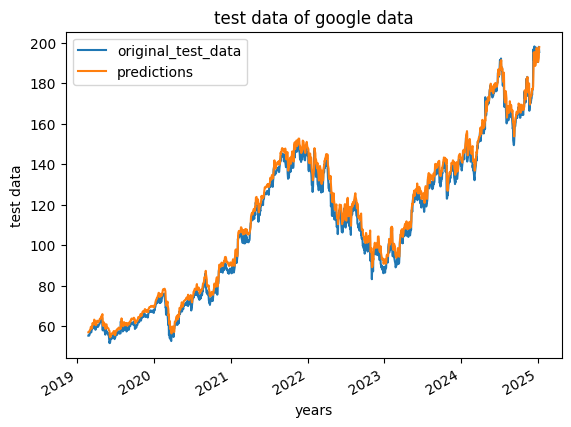

In [101]:
plot_graph((15,6), ploting_data, 'test data')

<Figure size 1500x600 with 0 Axes>

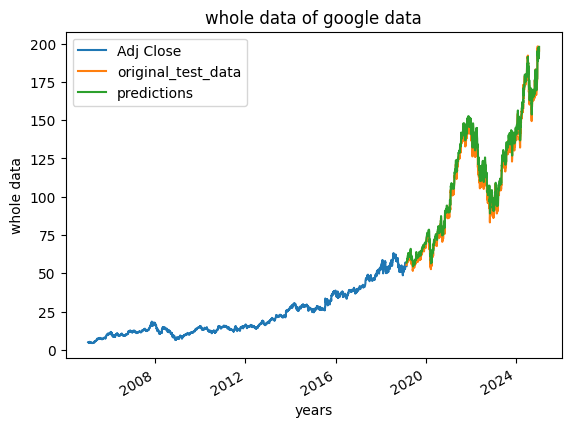

In [102]:
plot_graph((15,6), pd.concat([Adj_close_price[:splitting_len+100],ploting_data], axis=0), 'whole data')
